Business Case: Delhivery - Feature Engineering

About Delhivery and problem statement:

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

Definition of Problem:
    
The company wants to understand and process the data coming out of data engineering pipelines:

    • Clean, sanitize and manipulate data to get useful features out of raw fields

    • Make sense out of the raw data and help the data science team to build forecasting models on it

Column profiling:
    
    data - tells whether the data is testing or training data
    trip_creation_time – Timestamp of trip creation
    route_schedule_uuid – Unique Id for a particular route schedule
    route_type – Transportation type
        FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
        Carting: Handling system consisting of small vehicles (carts)
    trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
    source_center - Source ID of trip origin
    source_name - Source Name of trip origin
    destination_cente – Destination ID
    destination_name – Destination Name
    od_start_time – Trip start time
    od_end_time – Trip end time
    start_scan_to_end_scan – Time taken to deliver from source to destination
    is_cutoff – Unknown field
    cutoff_factor – Unknown field
    cutoff_timestamp – Unknown field
    actual_distance_to_destination – Distance in Kms between source and destination warehouse
    actual_time – Actual time taken to complete the delivery (Cumulative)
    osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
    osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
    factor – Unknown field
    segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
    segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
    segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
    segment_factor – Unknown field

In [ ]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats import norm, chi2, f # distributions
from scipy.stats import ttest_ind, f_oneway, kruskal # numerical vs categorical
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.simplefilter('ignore')
import colorama
from colorama import Fore

Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.

In [ ]:
#Read the bike_sharing data
df = pd.read_csv('delhivery_data.csv')
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
#Checking the shape of the data
df.shape

(144867, 24)

In [ ]:
#Data type of all the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

Initial Observation:

1. We have some missing values in the data for source_name and destination_name.
2. There are multiple rows for a trip id. We may have to do aggregation on the data.
3. There are actual and estimated distance and time in the data. We may find out how Delhivery have fared in meeting the expected timelines in delivering the package.

In [ ]:
#Finding the missing values
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

Observation: We have 293 source name missing and 261 destination name missing.

In [ ]:
#Percentage of data missing for each attributes:

df.isnull().sum().sort_values(ascending=False)
(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

source_name                       0.202254
destination_name                  0.180165
data                              0.000000
cutoff_factor                     0.000000
segment_osrm_distance             0.000000
segment_osrm_time                 0.000000
segment_actual_time               0.000000
factor                            0.000000
osrm_distance                     0.000000
osrm_time                         0.000000
actual_time                       0.000000
actual_distance_to_destination    0.000000
cutoff_timestamp                  0.000000
is_cutoff                         0.000000
trip_creation_time                0.000000
start_scan_to_end_scan            0.000000
od_end_time                       0.000000
od_start_time                     0.000000
destination_center                0.000000
source_center                     0.000000
trip_uuid                         0.000000
route_type                        0.000000
route_schedule_uuid               0.000000
segment_fac

Observation: We have 20% of data missing for source_name and 18% for destination_name.

Statistical summary of the data:

In [ ]:
df.describe(include='all')

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,...,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,...,93180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,...,2018-09-24 05:19:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,...,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000


Observation:
    
    1. We have two types of data and also have two types of route_type.
    2. There are 14817 unique trip ids.
    3. There are 1508 unique source center and 1481 unique destination center.
    4. There is significant difference between mean and median for distance and time data suggesting data is right skewed.

Preprocessing of Data:

In [ ]:
#Dropping unwanted columns
df.drop(['is_cutoff','cutoff_factor','route_schedule_uuid','segment_factor','factor','cutoff_timestamp'],axis=1,inplace=True)

In [ ]:
df.head(10)

,data,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153
5,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,10.403038,15.0,11.0,12.1171,15.0,11.0,12.1171
6,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,18.045481,44.0,17.0,21.2890,28.0,6.0,9.1719
7,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,28.061896,65.0,29.0,35.8252,21.0,11.0,14.5362
8,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,38.939167,76.0,39.0,47.1900,10.0,10.0,11.3648
9,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,26.0,6.0,6.0434


Merging of rows and aggregation of fields:

From the above table we can see for a unique trip id there are multiple segment level data. Also, some attributes are getting summed cumulatively. for e.g. actual time is cumulative sum of segment time. Hence we can group data on segment and trip level and aggregate few numerical fields.

In [ ]:
#Grouping the data on segment level basis first and last occurence of different attributes and sum of distances and time.

segment=df.groupby(['trip_uuid','source_center','destination_center']).agg({'trip_creation_time':'first','source_name':'first','destination_name':'last','od_start_time':'first','od_end_time':'last','start_scan_to_end_scan':'last','actual_time':'last','osrm_time':'last','segment_actual_time':'sum','segment_osrm_time':'sum','osrm_distance':'last','segment_osrm_distance':'sum','actual_distance_to_destination':'last','route_type':'last'}).reset_index()
#sort based on trip_uuid and od_start
segment=segment.sort_values(['trip_uuid','od_start_time'])
segment

,trip_uuid,source_center,destination_center,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,actual_distance_to_destination,route_type
1,trip-153671041653548748,IND462022AAA,IND209304AAA,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,830.0,388.0,820.0,474.0,544.8027,649.8528,440.973689,FTL
0,trip-153671041653548748,IND209304AAA,IND000000ACB,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,732.0,329.0,728.0,534.0,446.5496,670.6205,383.759164,FTL
3,trip-153671042288605164,IND572101AAA,IND561203AAB,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,96.0,42.0,95.0,39.0,56.9116,55.9899,48.542890,Carting
2,trip-153671042288605164,IND561203AAB,IND562101AAA,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,47.0,26.0,46.0,26.0,28.1994,28.1995,24.644021,Carting
5,trip-153671043369099517,IND562132AAA,IND000000ACB,2018-09-12 00:00:33.691250,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,2736.0,1528.0,2700.0,1710.0,2072.8556,2227.5270,1689.964663,FTL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069,IND628204AAA,IND627657AAA,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,51.0,41.0,49.0,42.0,42.5213,42.1431,33.627182,Carting
26362,trip-153861115439069069,IND627657AAA,IND628613AAA,2018-10-03 23:59:14.390954,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),Peikulam_SriVnktpm_D (Tamil Nadu),2018-10-04 03:31:11.183797,2018-10-04 04:16:39.894872,45.0,33.0,31.0,32.0,30.0,25.7087,25.7087,17.373209,Carting
26364,trip-153861115439069069,IND628613AAA,IND627005AAA,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,90.0,48.0,89.0,77.0,40.6080,78.5869,33.673835,Carting
26367,trip-153861118270144424,IND583201AAA,IND583119AAA,2018-10-03 23:59:42.701692,Hospet (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.712656,2018-10-04 03:58:40.726547,66.0,42.0,26.0,41.0,25.0,28.0484,28.0484,25.534793,FTL


In [ ]:
#Now grouping the above segment level data to trip level
trip=segment.groupby(['trip_uuid']).agg({'trip_creation_time':'first','source_name':'first','destination_name':'last',
'od_start_time':'first','od_end_time':'last','start_scan_to_end_scan':'sum','actual_time':'sum','osrm_time':'sum',
'segment_actual_time':'sum','segment_osrm_time':'sum','osrm_distance':'sum','segment_osrm_distance':'sum',
'actual_distance_to_destination':'sum','route_type':'last'}).reset_index()
#sort based on trip_uuid and od_start
trip

,trip_uuid,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,actual_distance_to_destination,route_type
0,trip-153671041653548748,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,1562.0,717.0,1548.0,1008.0,991.3523,1320.4733,824.732854,FTL
1,trip-153671042288605164,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,143.0,68.0,141.0,65.0,85.1110,84.1894,73.186911,Carting
2,trip-153671043369099517,2018-09-12 00:00:33.691250,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,3347.0,1740.0,3308.0,1941.0,2354.0665,2545.2678,1927.404273,FTL
3,trip-153671046011330457,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,59.0,15.0,59.0,16.0,19.6800,19.8766,17.175274,Carting
4,trip-153671052974046625,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,341.0,117.0,340.0,115.0,146.7918,146.7919,127.448500,FTL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,2018-10-03 23:55:56.258533,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,257.0,83.0,62.0,82.0,62.0,73.4630,64.8551,57.762332,Carting
14813,trip-153861104386292051,2018-10-03 23:57:23.863155,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,60.0,21.0,12.0,21.0,11.0,16.0882,16.0883,15.513784,Carting
14814,trip-153861106442901555,2018-10-03 23:57:44.429324,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-10-03 23:57:44.429324,2018-10-04 06:59:51.621332,421.0,282.0,48.0,281.0,88.0,58.9037,104.8866,38.684839,Carting
14815,trip-153861115439069069,2018-10-03 23:59:14.390954,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-03 23:59:14.390954,2018-10-04 05:47:45.162682,347.0,264.0,179.0,258.0,221.0,171.1103,223.5324,134.723836,Carting


Finding the missing values on trip level data:

In [ ]:
trip.isna().sum()

trip_uuid                          0
trip_creation_time                 0
source_name                       10
destination_name                   8
od_start_time                      0
od_end_time                        0
start_scan_to_end_scan             0
actual_time                        0
osrm_time                          0
segment_actual_time                0
segment_osrm_time                  0
osrm_distance                      0
segment_osrm_distance              0
actual_distance_to_destination     0
route_type                         0
dtype: int64

In [ ]:
#Percentage of missing data
trip.isna().sum()/len(trip) 

trip_uuid                         0.000000
trip_creation_time                0.000000
source_name                       0.000675
destination_name                  0.000540
od_start_time                     0.000000
od_end_time                       0.000000
start_scan_to_end_scan            0.000000
actual_time                       0.000000
osrm_time                         0.000000
segment_actual_time               0.000000
segment_osrm_time                 0.000000
osrm_distance                     0.000000
segment_osrm_distance             0.000000
actual_distance_to_destination    0.000000
route_type                        0.000000
dtype: float64

We can see after grouping the data on trip level, the missing data is significantly reduced. We may drop these few missing rows.

In [ ]:
#Missing Values treatment
trip=trip.dropna()
trip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14800 entries, 0 to 14816
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trip_uuid                       14800 non-null  object 
 1   trip_creation_time              14800 non-null  object 
 2   source_name                     14800 non-null  object 
 3   destination_name                14800 non-null  object 
 4   od_start_time                   14800 non-null  object 
 5   od_end_time                     14800 non-null  object 
 6   start_scan_to_end_scan          14800 non-null  float64
 7   actual_time                     14800 non-null  float64
 8   osrm_time                       14800 non-null  float64
 9   segment_actual_time             14800 non-null  float64
 10  segment_osrm_time               14800 non-null  float64
 11  osrm_distance                   14800 non-null  float64
 12  segment_osrm_distance           

There is no missing values in the data after aggregation on trip level.

In [ ]:
#Changing object datatypes to datetime
trip['od_start_time']=pd.to_datetime(trip['od_start_time'])
trip['od_end_time']=pd.to_datetime(trip['od_end_time'])
trip['trip_creation_time']=pd.to_datetime(trip['trip_creation_time'])

In [ ]:
trip.head()

,trip_uuid,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,actual_distance_to_destination,route_type
0,trip-153671041653548748,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,1562.0,717.0,1548.0,1008.0,991.3523,1320.4733,824.732854,FTL
1,trip-153671042288605164,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,143.0,68.0,141.0,65.0,85.1110,84.1894,73.186911,Carting
2,trip-153671043369099517,2018-09-12 00:00:33.691250,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,3347.0,1740.0,3308.0,1941.0,2354.0665,2545.2678,1927.404273,FTL
3,trip-153671046011330457,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,59.0,15.0,59.0,16.0,19.6800,19.8766,17.175274,Carting
4,trip-153671052974046625,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,341.0,117.0,340.0,115.0,146.7918,146.7919,127.448500,FTL


In [ ]:
trip.dtypes

trip_uuid                                 object
trip_creation_time                datetime64[ns]
source_name                               object
destination_name                          object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
actual_time                              float64
osrm_time                                float64
segment_actual_time                      float64
segment_osrm_time                        float64
osrm_distance                            float64
segment_osrm_distance                    float64
actual_distance_to_destination           float64
route_type                                object
dtype: object

Feature Creation:

Some extra feature creation to extract state, city , month , day, year from the data. We can sue these feature to see how data is distributed basis source states and destination states.

In [ ]:
trip[['SourceAddress','SourceState']] = trip.source_name.str.split("(",expand=True)
trip['SourceState']=trip.SourceState.str.strip(")")
trip[['SourceCity','SourcePlace','SourceCode',"S"]] = trip.SourceAddress.str.split("_",expand=True)
trip.drop(['SourceAddress',"S","source_name"],axis=1,inplace=True)

trip[['Dest_address','Dest_State']] = trip.destination_name.str.split("(",expand=True)
trip['Dest_State']=trip.Dest_State.str.strip(")")
trip[['Dest_City','Dest_Place','Dest_Code',"D"]] = trip.Dest_address.str.split("_",expand=True)
trip.drop(['Dest_address',"D","destination_name"],axis=1,inplace=True)

trip['trip_month'] = trip['trip_creation_time'].dt.month
trip['trip_year'] = trip['trip_creation_time'].dt.year
trip['trip_day'] = trip['trip_creation_time'].dt.day
trip.drop(["trip_creation_time"],axis=1,inplace=True)

trip

,trip_uuid,od_start_time,od_end_time,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,...,SourceCity,SourcePlace,SourceCode,Dest_State,Dest_City,Dest_Place,Dest_Code,trip_month,trip_year,trip_day
0,trip-153671041653548748,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,1562.0,717.0,1548.0,1008.0,991.3523,1320.4733,...,Bhopal,Trnsport,H,Haryana,Gurgaon,Bilaspur,HB,9,2018,12
1,trip-153671042288605164,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,143.0,68.0,141.0,65.0,85.1110,84.1894,...,Tumkur,Veersagr,I,Karnataka,Chikblapur,ShntiSgr,D,9,2018,12
2,trip-153671043369099517,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,3347.0,1740.0,3308.0,1941.0,2354.0665,2545.2678,...,Bangalore,Nelmngla,H,Punjab,Chandigarh,Mehmdpur,H,9,2018,12
3,trip-153671046011330457,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,59.0,15.0,59.0,16.0,19.6800,19.8766,...,Mumbai Hub,None,None,Maharashtra,Mumbai,MiraRd,IP,9,2018,12
4,trip-153671052974046625,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,341.0,117.0,340.0,115.0,146.7918,146.7919,...,Bellary,Dc,None,Karnataka,Bellary,Dc,None,9,2018,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,257.0,83.0,62.0,82.0,62.0,73.4630,64.8551,...,Chandigarh,Mehmdpur,H,Punjab,Chandigarh,Mehmdpur,H,10,2018,3
14813,trip-153861104386292051,2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,60.0,21.0,12.0,21.0,11.0,16.0882,16.0883,...,FBD,Balabhgarh,DPC,Haryana,Faridabad,Blbgarh,DC,10,2018,3
14814,trip-153861106442901555,2018-10-03 23:57:44.429324,2018-10-04 06:59:51.621332,421.0,282.0,48.0,281.0,88.0,58.9037,104.8866,...,Kanpur,Central,H,Uttar Pradesh,Kanpur,Central,H,10,2018,3
14815,trip-153861115439069069,2018-10-03 23:59:14.390954,2018-10-04 05:47:45.162682,347.0,264.0,179.0,258.0,221.0,171.1103,223.5324,...,Tirunelveli,VdkkuSrt,I,Tamil Nadu,Tirunelveli,VdkkuSrt,I,10,2018,3


Univariate Analysis:

The distribution of the data for the quantitative attributes can be explored using histplot.

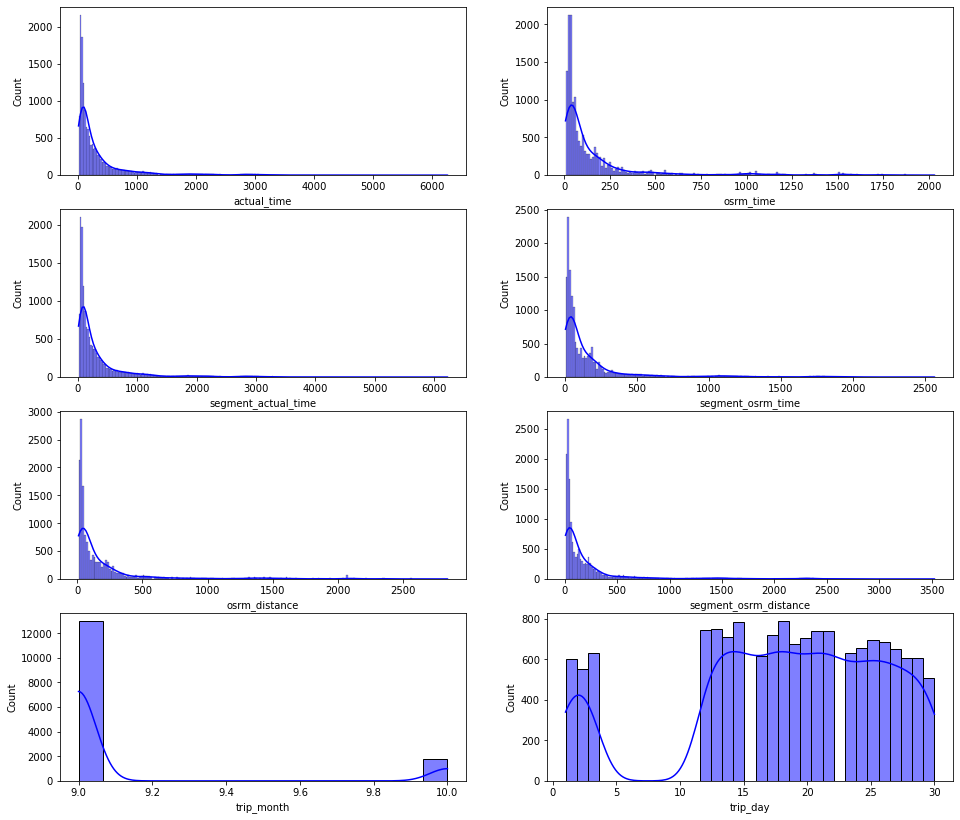

In [ ]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(16, 10))
fig.subplots_adjust(top=1.2)

sns.histplot(data=trip, x="actual_time", kde=True, ax=axis[0,0],color='blue')
sns.histplot(data=trip, x="osrm_time", kde=True, ax=axis[0,1],color='blue')
sns.histplot(data=trip, x="segment_actual_time", kde=True, ax=axis[1,0],color='blue')
sns.histplot(data=trip, x="segment_osrm_time", kde=True, ax=axis[1,1],color='blue')
sns.histplot(data=trip, x="osrm_distance", kde=True, ax=axis[2,0],color='blue')
sns.histplot(data=trip, x="segment_osrm_distance", kde=True, ax=axis[2,1],color='blue')
sns.histplot(data=trip, x="trip_month", kde=True, ax=axis[3,0],color='blue')
sns.histplot(data=trip, x="trip_day", kde=True, ax=axis[3,1],color='blue')

plt.show()

Observation:
    
    1. From the above histplot, it looks like the OSRM distance and time have noticeable difference.
    2. Also, distance and time are right skewed, i.e. mean is greater than median. It suggest we have outliers in the data.
    3. We seem to have deliveries in only two months and more deliveries during the later half of the month.

In [ ]:
# catgeorical and numerical columns
cat_cols = trip.dtypes =='object'
cat_cols = list(cat_cols[cat_cols].index)
cat_cols

['trip_uuid',
 'route_type',
 'SourceState',
 'SourceCity',
 'SourcePlace',
 'SourceCode',
 'Dest_State',
 'Dest_City',
 'Dest_Place',
 'Dest_Code']

In [ ]:
num_cols = trip.dtypes !='object'
num_cols = list(num_cols[num_cols].index)
num_cols

['od_start_time',
 'od_end_time',
 'start_scan_to_end_scan',
 'actual_time',
 'osrm_time',
 'segment_actual_time',
 'segment_osrm_time',
 'osrm_distance',
 'segment_osrm_distance',
 'actual_distance_to_destination',
 'trip_month',
 'trip_year',
 'trip_day']

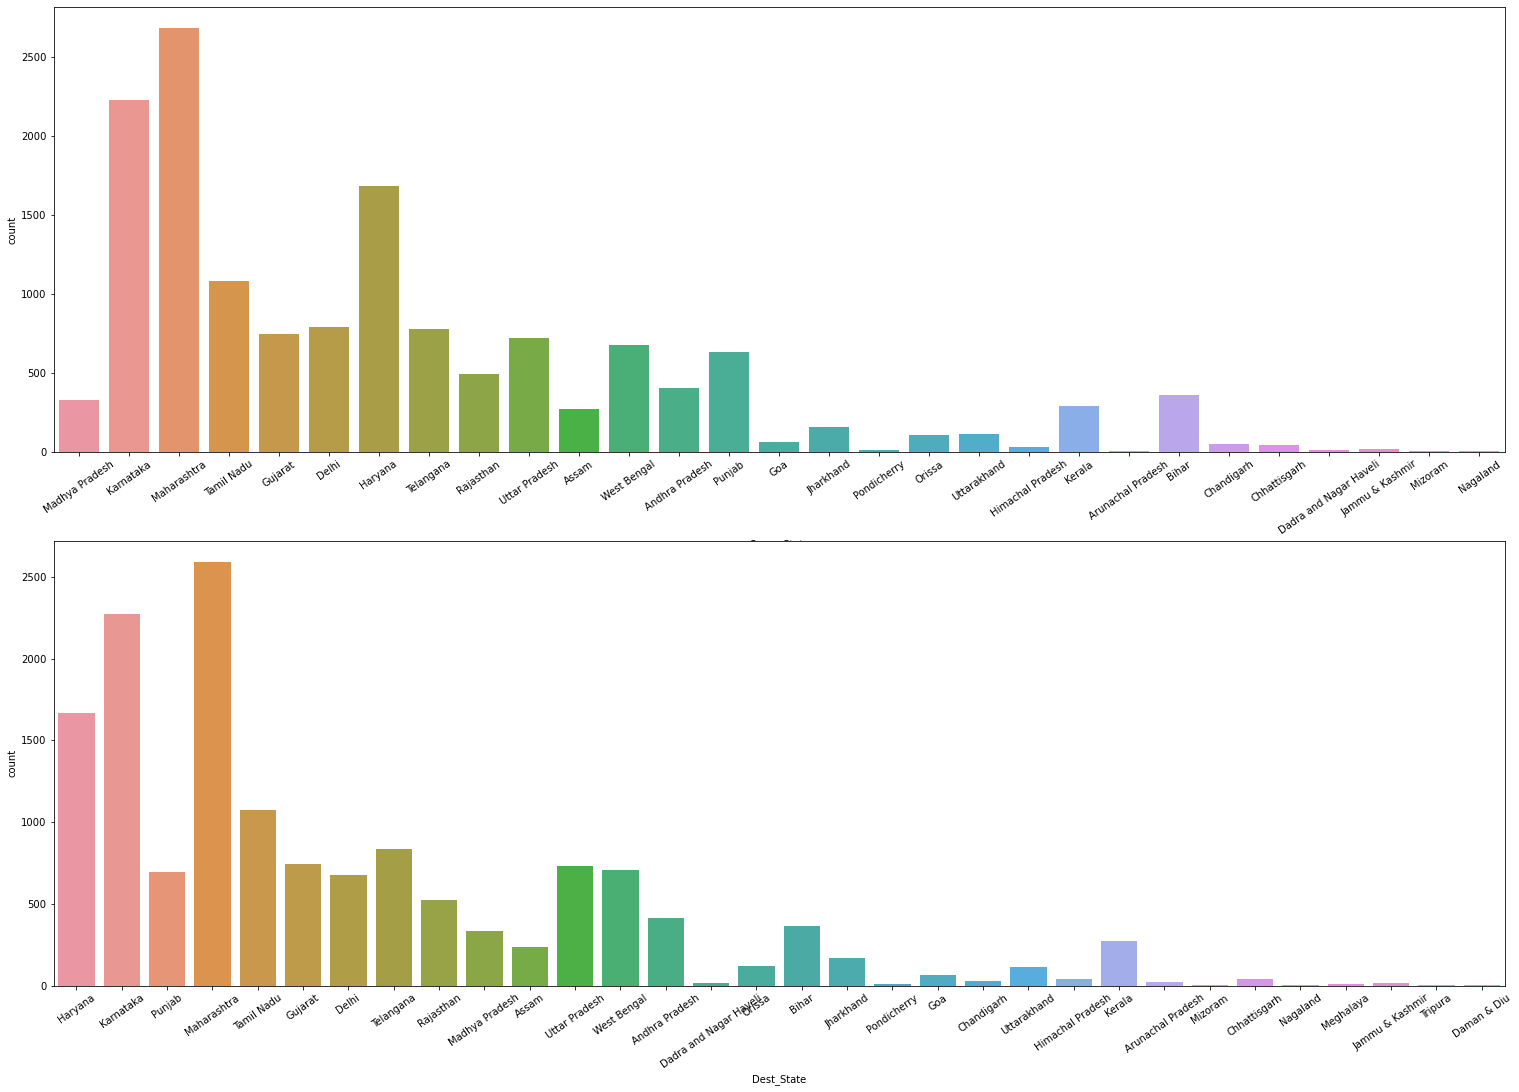

In [ ]:
# countplot of package deliveries per source state and destination states:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(26, 18))

x=sns.countplot(data=trip, x='SourceState',ax=axs[0])
plt.setp(x.get_xticklabels(), rotation=35)
x=sns.countplot(data=trip, x='Dest_State',ax=axs[1])
plt.setp(x.get_xticklabels(), rotation=35)

plt.show()

Observation:

    1. We can see Maharashtra, Karnataka, Haryana are states with maximum number of packages sent and delivered.
    2. Nagaland, Mizoram, Daman & Diu, Tripura are among the ones with least active states.
    
Note: Since the number of cities are too large, it would be difficult the visualize the countplot basis cities.

Statistical summary of categorical attributes of Trip level data:

In [ ]:
trip.describe(include='object')

,trip_uuid,route_type,SourceState,SourceCity,SourcePlace,SourceCode,Dest_State,Dest_City,Dest_Place,Dest_Code
count,14800,14800,14800,14800,14159,12986,14800,14800,14072,13079
unique,14800,2,29,681,643,24,32,777,723,27
top,trip-153671041653548748,Carting,Maharashtra,Gurgaon,Central,HB,Maharashtra,Bengaluru,Central,H
freq,1,8906,2682,1022,1039,3314,2591,1056,921,2752


Observation:

    1. Carting(small vehicles) type is used more than Full Truck load for delivering the packages.
    2. Maharashtra tops the list in both number of packages sent and delivered.
    3. The city with highest number of packages sent from is Gurgaon and Bengaluru received maximum deliveries. Interesting both the cities do not belong to Maharashtra.

Another feature creation: timedelta(difference b/w trip start time and trip end time)

Find the time difference between Trip start time and Trip end time:

In [ ]:
from datetime import datetime, timedelta
# timedelta = current_date - x_date_time
# trip['timedelta']=trip['od_end_time'] - trip['od_start_time'].total_seconds()/60
trip['timedelta']=((trip.od_end_time - trip.od_start_time).dt.total_seconds())/60


trip

,trip_uuid,od_start_time,od_end_time,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,...,SourcePlace,SourceCode,Dest_State,Dest_City,Dest_Place,Dest_Code,trip_month,trip_year,trip_day,timedelta
0,trip-153671041653548748,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,1562.0,717.0,1548.0,1008.0,991.3523,1320.4733,...,Trnsport,H,Haryana,Gurgaon,Bilaspur,HB,9,2018,12,2260.109800
1,trip-153671042288605164,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,143.0,68.0,141.0,65.0,85.1110,84.1894,...,Veersagr,I,Karnataka,Chikblapur,ShntiSgr,D,9,2018,12,181.611874
2,trip-153671043369099517,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,3347.0,1740.0,3308.0,1941.0,2354.0665,2545.2678,...,Nelmngla,H,Punjab,Chandigarh,Mehmdpur,H,9,2018,12,3934.362520
3,trip-153671046011330457,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,59.0,15.0,59.0,16.0,19.6800,19.8766,...,None,None,Maharashtra,Mumbai,MiraRd,IP,9,2018,12,100.494935
4,trip-153671052974046625,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,341.0,117.0,340.0,115.0,146.7918,146.7919,...,Dc,None,Karnataka,Bellary,Dc,None,9,2018,12,718.349042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,257.0,83.0,62.0,82.0,62.0,73.4630,64.8551,...,Mehmdpur,H,Punjab,Chandigarh,Mehmdpur,H,10,2018,3,405.485842
14813,trip-153861104386292051,2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,60.0,21.0,12.0,21.0,11.0,16.0882,16.0883,...,Balabhgarh,DPC,Haryana,Faridabad,Blbgarh,DC,10,2018,3,60.590521
14814,trip-153861106442901555,2018-10-03 23:57:44.429324,2018-10-04 06:59:51.621332,421.0,282.0,48.0,281.0,88.0,58.9037,104.8866,...,Central,H,Uttar Pradesh,Kanpur,Central,H,10,2018,3,422.119867
14815,trip-153861115439069069,2018-10-03 23:59:14.390954,2018-10-04 05:47:45.162682,347.0,264.0,179.0,258.0,221.0,171.1103,223.5324,...,VdkkuSrt,I,Tamil Nadu,Tirunelveli,VdkkuSrt,I,10,2018,3,348.512862


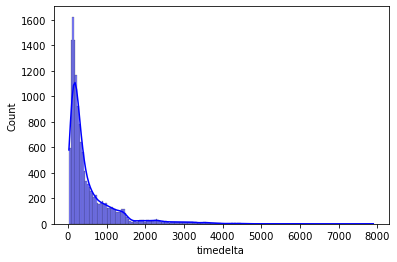

In [ ]:
sns.histplot(data=trip, x="timedelta", kde=True,color='blue')

plt.show()

Observation:
    
    1. We can see the distribution is right skewed. We can see for most of the deliveries the difference between trip start time and trip end time is approximately less than 700. We have some outliers as the data is right tailed. 

Statistical summary of the numerical attributes of the processed data:

In [ ]:
trip.describe()

,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,actual_distance_to_destination,trip_month,trip_year,trip_day,timedelta
count,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.0,14800.000000,14800.000000
mean,530.927230,357.282905,161.478851,354.028919,181.056284,204.472239,223.341203,164.583349,9.120270,2018.0,18.376486,547.628388
std,658.658578,561.595093,271.498419,556.443324,314.703250,370.584337,416.842088,305.543364,0.325288,0.0,7.886717,668.669716
min,23.000000,9.000000,6.000000,9.000000,6.000000,9.072900,9.072900,9.002461,9.000000,2018.0,1.000000,23.461468
25%,149.000000,67.000000,29.000000,66.000000,30.000000,30.775025,32.617700,22.786366,9.000000,2018.0,14.000000,151.120639
50%,280.000000,149.000000,60.000000,147.000000,65.000000,65.591250,70.113450,48.463337,9.000000,2018.0,19.000000,288.850851
75%,638.000000,370.000000,168.250000,367.000000,185.000000,208.632775,218.917675,164.705551,9.000000,2018.0,25.000000,673.576438
max,7898.000000,6265.000000,2032.000000,6230.000000,2564.000000,2840.081000,3523.632400,2186.531787,10.000000,2018.0,30.000000,7898.551955


Observation:
    
    1. We can see there is little difference between actual_time(cumulative) and segment_actual_time, osrm_distance and segment_osrm_distance, osrm_time and segment_osrm_time.
    2. Also, there is difference between actual_time and osrm_time. This can cause dissatisfaction to the customers.

How delivery is distributed on a distance basis?

In [ ]:
bins=[0,100,250,500,1000, 1500, 2000, 3000, ]
group=['D1','D2','D3','D4','D5','D6','D7']
trip['Distance']= pd.cut(trip['actual_distance_to_destination'],bins,labels=group)
trip['Distance'].value_counts()

D1    9464
D2    3171
D3    1018
D4     491
D5     432
D6     202
D7      22
Name: Distance, dtype: int64

Observation:
    
    We can see most of the deliveries are within 100 KM range followed by between 100-250 KM range.

Outliers detection using boxplot:

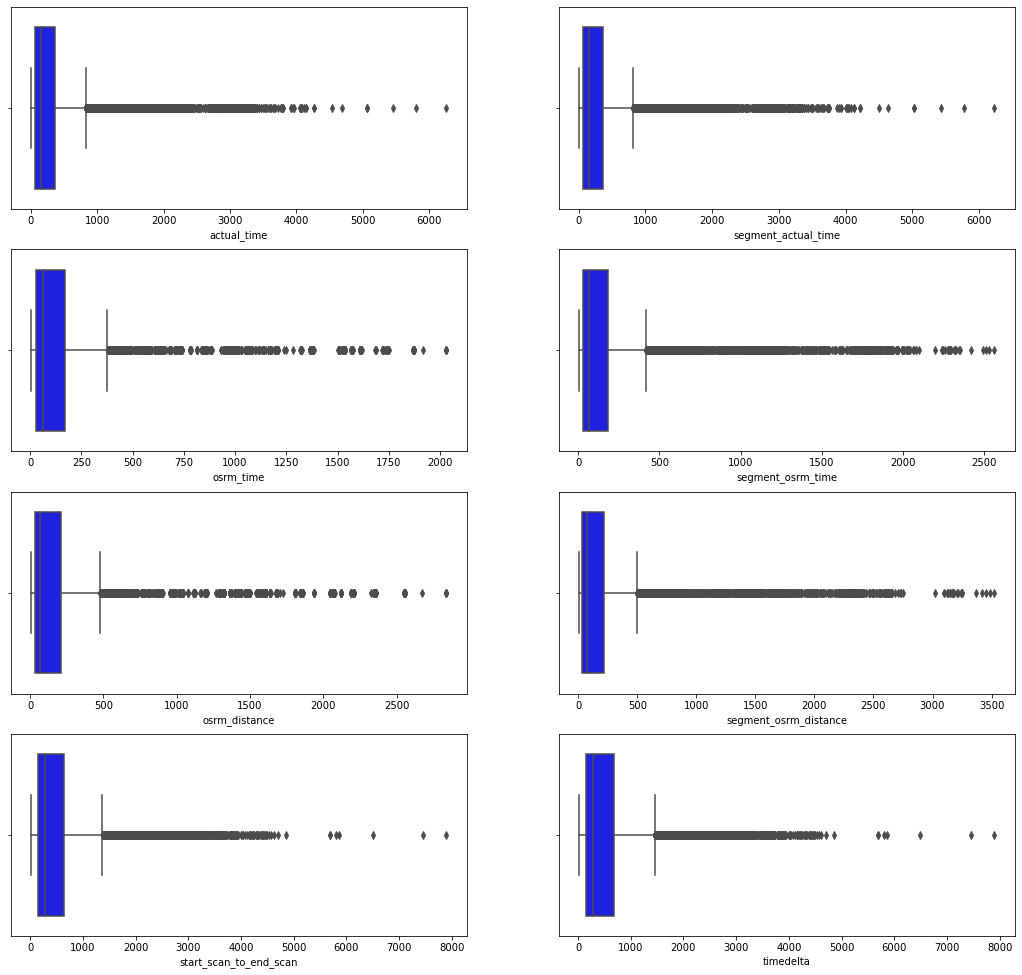

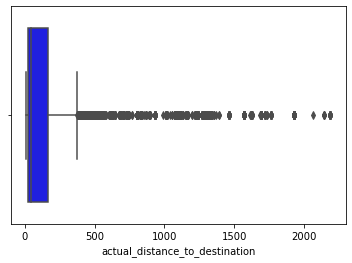

In [ ]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(18, 12))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=trip, x="actual_time", orient='h', ax=axis[0,0],color='blue')
sns.boxplot(data=trip, x="segment_actual_time", orient='h', ax=axis[0,1],color='blue')
sns.boxplot(data=trip, x="osrm_time", orient='h', ax=axis[1,0],color='blue')
sns.boxplot(data=trip, x="segment_osrm_time", orient='h', ax=axis[1,1],color='blue')
sns.boxplot(data=trip, x="osrm_distance", orient='h', ax=axis[2,0],color='blue')
sns.boxplot(data=trip, x="segment_osrm_distance", orient='h', ax=axis[2,1],color='blue')
sns.boxplot(data=trip, x="start_scan_to_end_scan", orient='h', ax=axis[3,0],color='blue')
sns.boxplot(data=trip, x="timedelta", orient='h', ax=axis[3,1],color='blue')
plt.show()

sns.boxplot(data=trip, x="actual_distance_to_destination", orient='h',color='blue')
plt.show()

Observation:
    
    1. We can see there are many outliers in all the above box plots.
    2. Actual time and osrm time looks different. 
    3. The cumulative distance and times also looks little different. i.e. segment_osrm_time and osrm_time should be equal but we can see there is little differnce between the two. Same is the case with osrm_time and segment_osrm_time.
    4. The given time taken from source to destination is similar to the calculated time difference between trip start time and trip end time.

Bivariate analaysis:

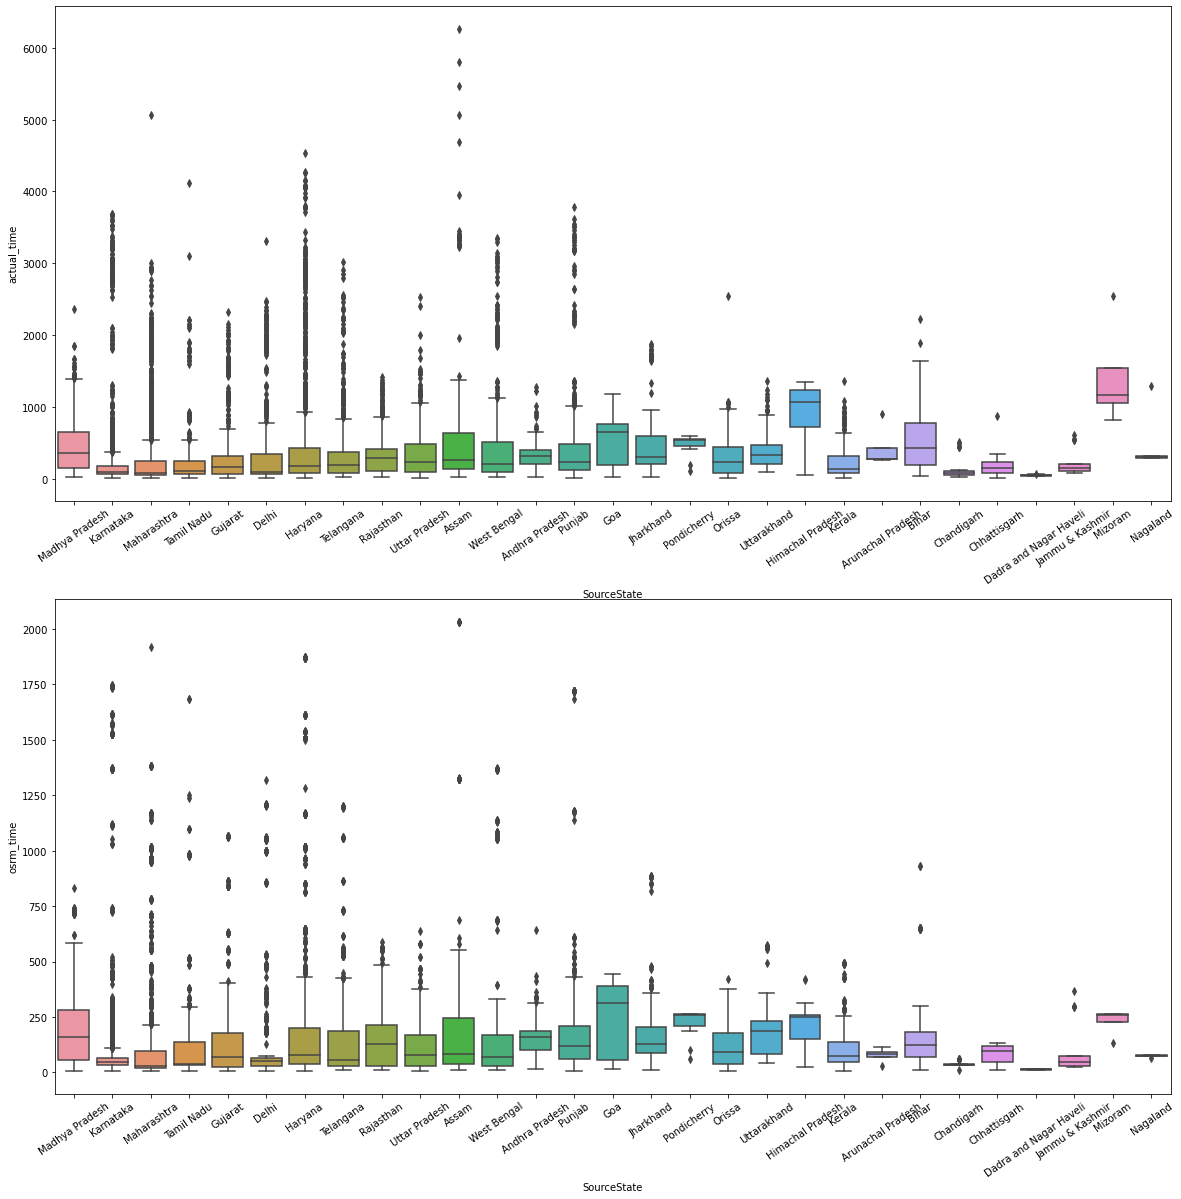

In [ ]:
# Boxplot showing relation of categorical attributes source state with actual time taken and osrm time.

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))

x=sns.boxplot(data=trip, x='SourceState',y='actual_time',ax=axs[0])
plt.setp(x.get_xticklabels(), rotation=35)
x=sns.boxplot(data=trip, x='SourceState',y='osrm_time',ax=axs[1])
plt.setp(x.get_xticklabels(), rotation=35)

plt.show()

Observation:
    
    1. From the above boxplots we can see how much time the states have taken actually and how much time the osrm has suggested. We can clesrly see the difference in actual time and osrm time for most of the states.
    2. There are quite a lot outliers in the data.

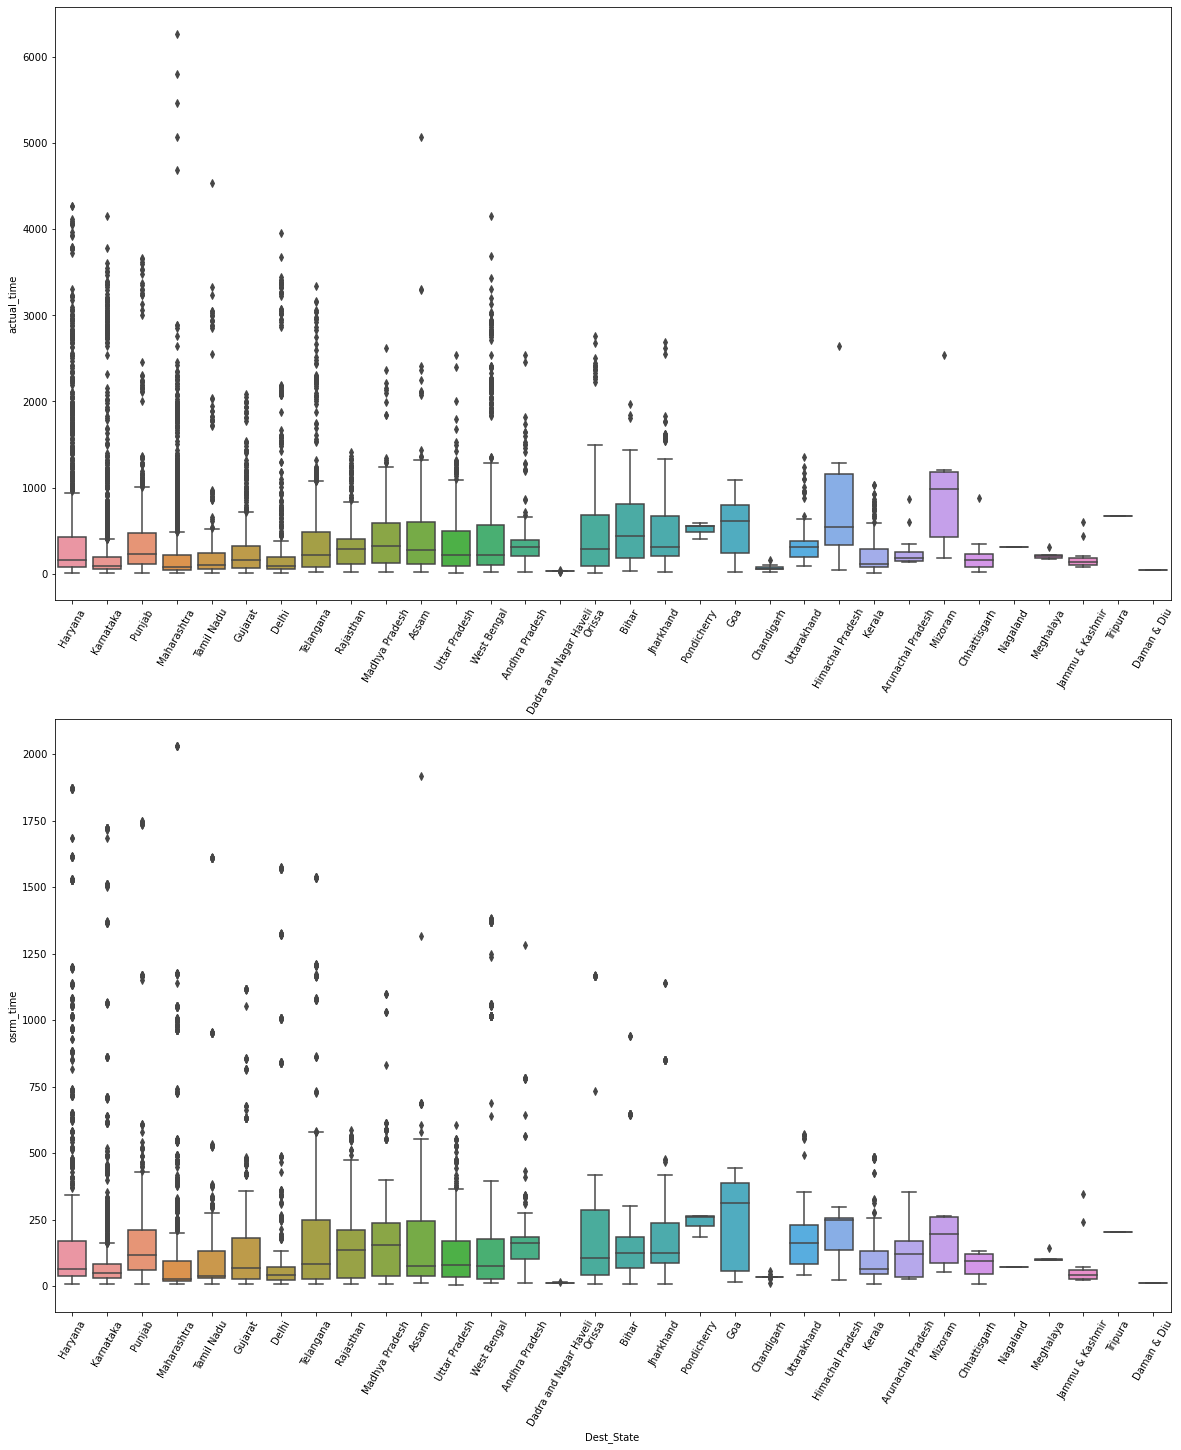

In [ ]:
# Boxplot showing relation of categorical attributes destination state with actual time taken and osrm time.

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20, 24))

x=sns.boxplot(data=trip, x='Dest_State',y='actual_time',ax=axs[0])
plt.setp(x.get_xticklabels(), rotation=60)
x=sns.boxplot(data=trip, x='Dest_State',y='osrm_time',ax=axs[1])
plt.setp(x.get_xticklabels(), rotation=60)

plt.show()

Observation:
    
    1. From the above boxplots for most of the states time taken to reach the package is greater than the osrm time.
    2. There are quite a lot outliers in the data.
    3. Also, three states Daman & diu , Meghalaya, and Tripura are only in the destination state list and not in the source state list.

<AxesSubplot:xlabel='route_type', ylabel='osrm_distance'>

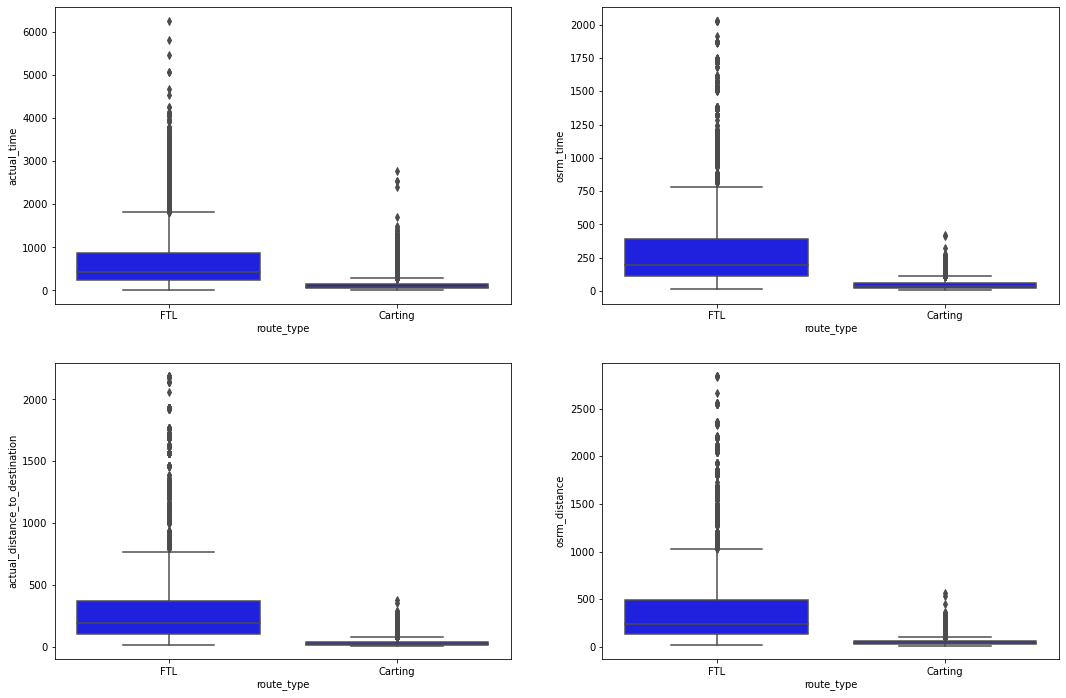

In [ ]:
# Boxplot showing relation of categorical attributes route type with actual time taken and osrm time.

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

sns.boxplot(data=trip, x='route_type',y='actual_time', ax=axis[0,0],color='blue')
sns.boxplot(data=trip, x='route_type',y='osrm_time', ax=axis[0,1],color='blue')
sns.boxplot(data=trip, x='route_type',y='actual_distance_to_destination', ax=axis[1,0],color='blue')
sns.boxplot(data=trip, x='route_type',y='osrm_distance', ax=axis[1,1],color='blue')


Observation:
    
    1. We can see from the above box plots how does time and distance behaves in relation to route_type. For FTL route type, we can see there are more outliers.

Hypothesis testing:

Test 1: T-test to compare new feature created for time difference between trip start time and trip end time(timedelta) vs start_scan_to_end_scan

First check the homogenity of variances:

In [ ]:
# H0 = Homogeneous variance
# Ha = non-homogeneous variance
# Significance Level = 95% confidence

stat, p_value = levene(trip['start_scan_to_end_scan'],trip['timedelta'])
print(stat, p_value)
if p_value<0.05:
  print(Fore.RED + "H0 is rejected")
else:
  print("\033[1;32m Fail to reject H0")

4.028176109537818 0.044755367067596044
H0 is rejected


Observation: Levene's test for homegenity is statistically significant to reject the equality of variances.Hence, we will have to compare the start_scan_to_end_scan and timedelta for unequal variances.

In [ ]:
# H0 : timedelta = start_scan_to_end_scan
# Ha :timedelta not equal to start_scan_to_end_scan
# Significance Level = 95% confidence
test_stat, p_value = ttest_ind(trip['timedelta'].sample(3000),trip['start_scan_to_end_scan'].sample(3000), equal_var=False)
print(test_stat, p_value)
if p_value<0.05:
  print(Fore.RED + "H0 is rejected")
else:
  print("\033[1;32m Fail to reject H0")

1.2547701117910515 0.20961113925999827
 Fail to reject H0


Observation:
    
    ttest is statistically not significant to reject the null hypothesis. Hence, we cannot say that there is statistical difference between the given time duration i.e. start_scan_to_end_scan and the new feature created from the difference between trip start time and trip end time.

<AxesSubplot:xlabel='timedelta', ylabel='start_scan_to_end_scan'>

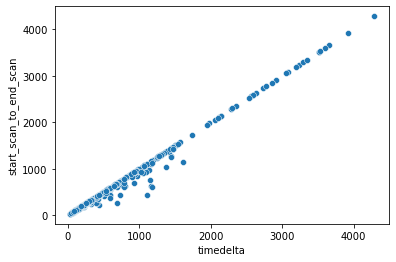

In [ ]:
sns.scatterplot(x=trip['timedelta'].sample(3000),y=trip['start_scan_to_end_scan'].sample(3000))

Observation: The scattter plot also doesn't show much differences between the two.

Test 2: T-test to compare actual_time aggregated value and OSRM time aggregated value:

In [ ]:
# Homogenity test:
    
# H0 = Homogeneous variance
# Ha = non-homogeneous variance
# Significance Level = 95% confidence

stat, p_value = levene(trip['actual_time'],trip['osrm_time'])
print(stat, p_value)
if p_value<0.05:
  print(Fore.RED + "H0 is rejected")
else:
  print("\033[1;32m Fail to reject H0")

1020.4994891914528 3.470800813899771e-220
H0 is rejected


Observation: Levene's test for homegenity is statistically significant to reject the equality of variances.Hence, we will have to compare the actual_time and osrm_time for unequal variances.

In [ ]:
# H0 : actual_time =  osrm_time
# Ha : actual_time not equal to osrm_time
# Significance Level = 95% confidence
test_stat, p_value = ttest_ind(trip['actual_time'].sample(3000),trip['osrm_time'].sample(3000), equal_var=False)
print(test_stat, p_value)
if p_value<0.05:
  print(Fore.RED + "H0 is rejected")
else:
  print("\033[1;32m Fail to reject H0")

16.720172826395107 6.449607122603372e-61
H0 is rejected


Observation:

Our ttest is statistically significant to reject the null hypothesis. Hence, we can say that there is statistical difference between the aggregated osrm time and aggregated actual time. This is definitely a cause of concern as this can impact customer satisfaction for the service provided.

<AxesSubplot:xlabel='actual_time', ylabel='osrm_time'>

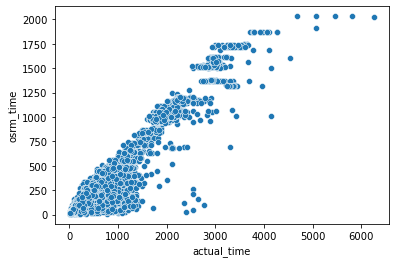

In [ ]:
sns.scatterplot(x=trip['actual_time'],y=trip['osrm_time'])

Observation: The scattter plot also shows the differences between aggregated osrm time and aggregated actual time.

Test 3: Hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value: 

In [ ]:
# Homogenity test:
    
# H0 = Homogeneous variance
# Ha = non-homogeneous variance
# Significance Level = 95% confidence

stat, p_value = levene(trip['osrm_distance'],trip['segment_osrm_distance'])
print(stat, p_value)
if p_value<0.05:
  print(Fore.RED + "H0 is rejected")
else:
  print("\033[1;32m Fail to reject H0")

13.73612434776314 0.0002107523278057755
H0 is rejected


Observation: Levene's test for homegenity is statistically significant to reject the equality of variances.Hence, we will have to compare the osrm_distance and segment_osrm_distance for unequal variances.

In [ ]:
# H0 : osrm_distance =  segment_osrm_distance
# Ha : osrm_distance not equal to segment_osrm_distance
# Significance Level = 95% confidence
test_stat, p_value = ttest_ind(trip['osrm_distance'].sample(3000),trip['segment_osrm_distance'].sample(3000), equal_var=False)
print(test_stat, p_value)
if p_value<0.05:
  print(Fore.RED + "H0 is rejected")
else:
  print("\033[1;32m Fail to reject H0")

-0.6958928060167716 0.48652300433417095
 Fail to reject H0


Our ttest is statistically significant to reject the null hypothesis. Hence, we can say that there is not enough statistical difference between the aggregated osrm distance and aggregated segment osrm distance. 

<AxesSubplot:xlabel='osrm_distance', ylabel='segment_osrm_distance'>

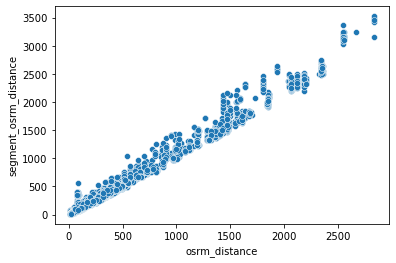

In [ ]:
sns.scatterplot(x=trip['osrm_distance'],y=trip['segment_osrm_distance'])

Observation: The scattter plot does not show much differences between aggregated osrm distance and aggregated segment osrm distance.

Test 4: Hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value:

In [ ]:
# Homogenity test:
    
# H0 = Homogeneous variance
# Ha = non-homogeneous variance
# Significance Level = 95% confidence

stat, p_value = levene(trip['actual_time'],trip['segment_actual_time'])
print(stat, p_value)
if p_value<0.05:
  print(Fore.RED + "H0 is rejected")
else:
  print("\033[1;32m Fail to reject H0")

0.1532525521100671 0.6954490990469593
 Fail to reject H0


Observation: Levene's test for homegenity is statistically not significant to reject the equality of variances.Hence, we can compare the actual_time and segment_actual_time for equal variances.

In [ ]:
# H0 : actual_time =  segment_actual_time
# Ha : actual_time not equal to segment_actual_time
# Significance Level = 95% confidence
test_stat, p_value = ttest_ind(trip['actual_time'].sample(3000),trip['segment_actual_time'].sample(3000), equal_var=True)
print(test_stat, p_value)
if p_value<0.05:
  print(Fore.RED + "H0 is rejected")
else:
  print("\033[1;32m Fail to reject H0")

-0.08463117966712871 0.932557434679216
 Fail to reject H0


Our ttest is statistically not significant to reject the null hypothesis. Hence, we cannot say that there is statistical difference between the aggregated actual_time and aggregated segment_actual_time.

<AxesSubplot:xlabel='actual_time', ylabel='segment_actual_time'>

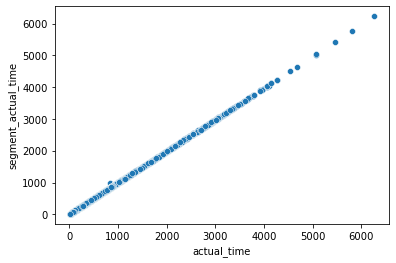

In [ ]:
sns.scatterplot(x=trip['actual_time'],y=trip['segment_actual_time'])

Observation: We have a very nice staright line in the scattter plot which shows not enough differences between aggregated actual_time and aggregated segment_actual_time.

Test 5: Hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value

In [ ]:
# Homogenity test:
    
# H0 = Homogeneous variance
# Ha = non-homogeneous variance
# Significance Level = 95% confidence

stat, p_value = levene(trip['osrm_time'],trip['segment_osrm_time'])
print(stat, p_value)
if p_value<0.05:
  print(Fore.RED + "H0 is rejected")
else:
  print("Fail to reject H0")

28.71807595806989 8.434382972244705e-08
H0 is rejected


Observation: Levene's test for homegenity is statistically significant to reject the equality of variances.Hence, we will have to compare the osrm_time and segment_osrm_time for unequal variances.

In [ ]:
# H0 : osrm_time =  segment_osrm_time
# Ha : osrm_time not equal to segment_osrm_time
# Significance Level = 95% confidence
test_stat, p_value = ttest_ind(trip['osrm_time'].sample(3000),trip['segment_osrm_time'].sample(3000), equal_var=False)
print(test_stat, p_value)
if p_value<0.05:
  print("H0 is rejected")
else:
  print("\033[1;32m Fail to reject H0")

-1.6631706992840356 0.09633126408779293
 Fail to reject H0


Our ttest is statistically not significant to reject the null hypothesis. Hence, we cannot say that there is statistical difference between the aggregated osrm_time and aggregated segment_osrm_time.

<AxesSubplot:xlabel='osrm_time', ylabel='segment_osrm_time'>

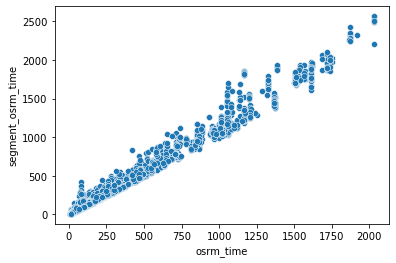

In [ ]:
sns.scatterplot(x=trip['osrm_time'],y=trip['segment_osrm_time'])

Observation: The scattter plot does not show much differences between aggregated osrm time and aggregated segment osrm time.

Correlation between numerical variables in the actual data set:

<AxesSubplot:>

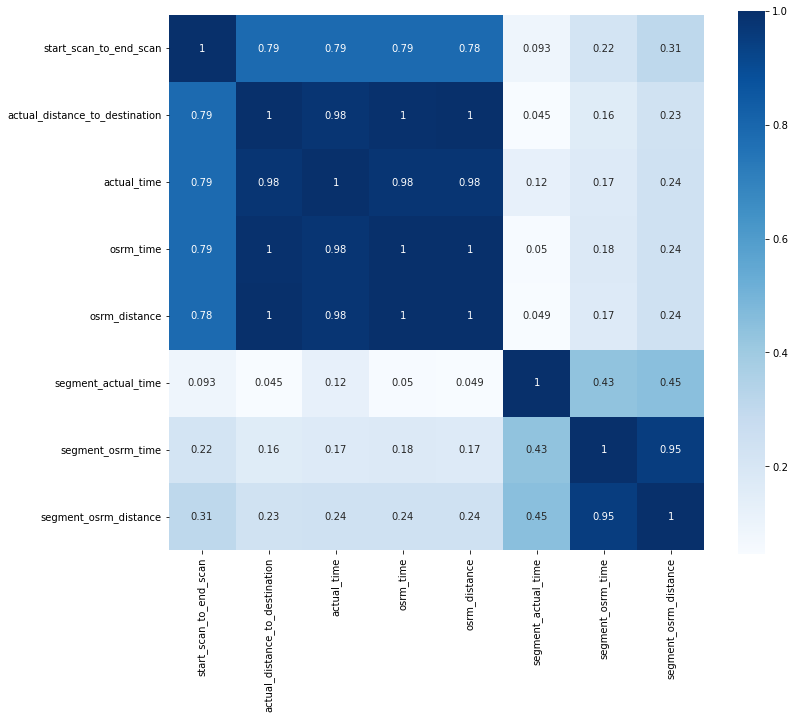

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(method='pearson'), square=True,annot=True, cmap="Blues")

Observation:
    
    We can notice there are some strong correlation between some of the numerical attributes. for e.g. segment_osrm_distance is strongly correlated to segment_osrm_time, actual_time and actual_distance_to_destination.

<AxesSubplot:>

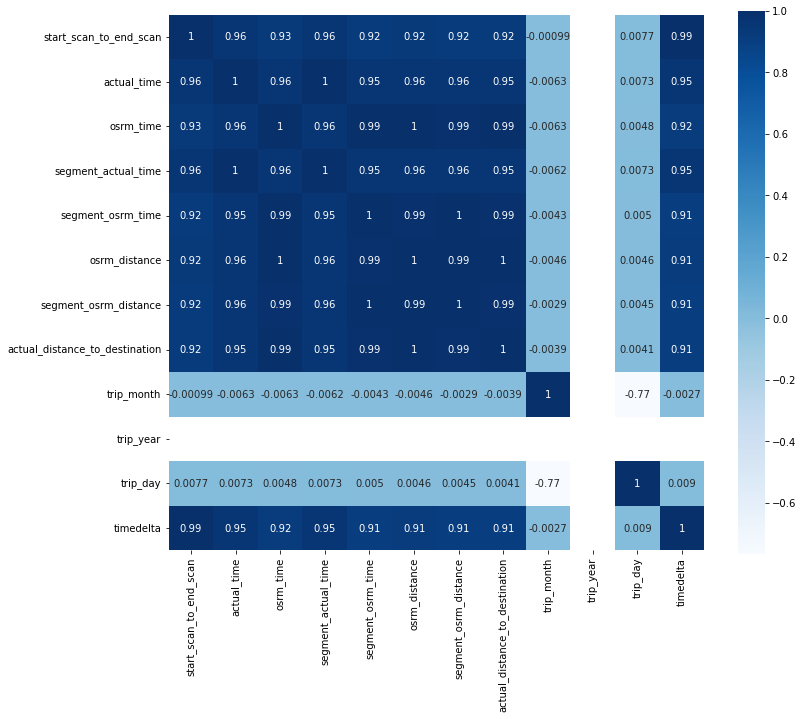

In [ ]:
#Correlation among numerical attributes in the aggregated data set
plt.figure(figsize=(12, 10))
sns.heatmap(trip.corr(method='pearson'), square=True,annot=True, cmap="Blues")

We can notice there are some strong correlation between some of the numerical attributes. for e.g. segment_osrm_distance is strongly correlated to segment_osrm_time, actual_time and actual_distance_to_destination.

In [ ]:
#One-hot encoding for route-type
oh_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_cols = oh_encoder.fit_transform(trip[['route_type']])
df_enc = pd.DataFrame(encoded_cols, columns=['Carting', "FTL"])
trip = trip.join(df_enc)
trip

,trip_uuid,od_start_time,od_end_time,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,...,Dest_City,Dest_Place,Dest_Code,trip_month,trip_year,trip_day,timedelta,Distance,Carting,FTL
0,trip-153671041653548748,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,1562.0,717.0,1548.0,1008.0,991.3523,1320.4733,...,Gurgaon,Bilaspur,HB,9,2018,12,2260.109800,D4,0.0,1.0
1,trip-153671042288605164,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,143.0,68.0,141.0,65.0,85.1110,84.1894,...,Chikblapur,ShntiSgr,D,9,2018,12,181.611874,D1,1.0,0.0
2,trip-153671043369099517,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,3347.0,1740.0,3308.0,1941.0,2354.0665,2545.2678,...,Chandigarh,Mehmdpur,H,9,2018,12,3934.362520,D6,0.0,1.0
3,trip-153671046011330457,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,59.0,15.0,59.0,16.0,19.6800,19.8766,...,Mumbai,MiraRd,IP,9,2018,12,100.494935,D1,1.0,0.0
4,trip-153671052974046625,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,341.0,117.0,340.0,115.0,146.7918,146.7919,...,Bellary,Dc,None,9,2018,12,718.349042,D2,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,257.0,83.0,62.0,82.0,62.0,73.4630,64.8551,...,Chandigarh,Mehmdpur,H,10,2018,3,405.485842,D1,NaN,NaN
14813,trip-153861104386292051,2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,60.0,21.0,12.0,21.0,11.0,16.0882,16.0883,...,Faridabad,Blbgarh,DC,10,2018,3,60.590521,D1,NaN,NaN
14814,trip-153861106442901555,2018-10-03 23:57:44.429324,2018-10-04 06:59:51.621332,421.0,282.0,48.0,281.0,88.0,58.9037,104.8866,...,Kanpur,Central,H,10,2018,3,422.119867,D1,NaN,NaN
14815,trip-153861115439069069,2018-10-03 23:59:14.390954,2018-10-04 05:47:45.162682,347.0,264.0,179.0,258.0,221.0,171.1103,223.5324,...,Tirunelveli,VdkkuSrt,I,10,2018,3,348.512862,D2,NaN,NaN


In [ ]:
#Standardize features by removing the mean and scaling to unit variance.

Std_scaler = StandardScaler().fit_transform(trip[['actual_time', 'osrm_time', 'segment_actual_time', 'segment_osrm_time', 'osrm_distance', 'segment_osrm_distance','actual_distance_to_destination','timedelta']].values)
print(Std_scaler)

[[ 2.14524274e+00  2.04619946e+00  2.14579162e+00 ...  2.63209785e+00
   2.16064849e+00  2.56111385e+00]
 [-3.81574105e-01 -3.44318799e-01 -3.82853216e-01 ... -3.33835063e-01
  -2.99137657e-01 -5.47398621e-01]
 [ 5.32379670e+00  5.81430450e+00  5.30884414e+00 ...  5.57046688e+00
   5.76965724e+00  5.06505450e+00]
 ...
 [-1.34056458e-01 -4.17986542e-01 -1.31246765e-01 ... -2.84181009e-01
  -4.12061851e-01 -1.87705169e-01]
 [-1.66109103e-01  6.45371736e-02 -1.72582111e-01 ...  4.58694653e-04
  -9.77292437e-02 -2.97788652e-01]
 [-1.46521375e-01 -3.44318799e-01 -1.43827088e-01 ... -3.42497389e-01
  -3.22393336e-01 -2.88972777e-01]]


<AxesSubplot:xlabel='actual_time', ylabel='osrm_time'>

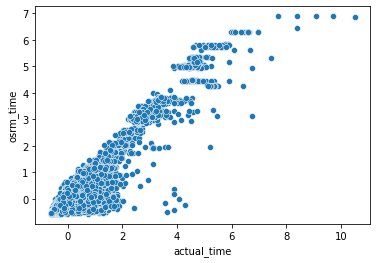

In [ ]:
Std_scaler = pd.DataFrame(Std_scaler, columns=['actual_time', 'osrm_time', 'segment_actual_time', 'segment_osrm_time', 'osrm_distance', 'segment_osrm_distance','actual_distance_to_destination', 'timedelta'])
sns.scatterplot(x=Std_scaler['actual_time'], y=Std_scaler['osrm_time'])

Transform features by scaling each feature to a given range.
#This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [ ]:
Min_Max = MinMaxScaler().fit_transform(trip[['actual_time', 'osrm_time', 'segment_actual_time', 'segment_osrm_time', 'osrm_distance', 'segment_osrm_distance','actual_distance_to_destination', 'timedelta']].values)
print(Min_Max)

[[0.24824169 0.35093781 0.24738788 ... 0.37313365 0.37461282 0.28401557]
 [0.02141944 0.03060217 0.02121845 ... 0.02137295 0.02947581 0.02008236]
 [0.53356777 0.85587364 0.53030059 ... 0.72162526 0.8809993  0.49661665]
 ...
 [0.04363811 0.0207305  0.04372287 ... 0.02726194 0.01363122 0.05062271]
 [0.04076087 0.08538993 0.04002572 ... 0.06102031 0.05773579 0.04127589]
 [0.04251918 0.03060217 0.04259765 ... 0.02034559 0.02621277 0.04202442]]


<AxesSubplot:xlabel='actual_time', ylabel='osrm_time'>

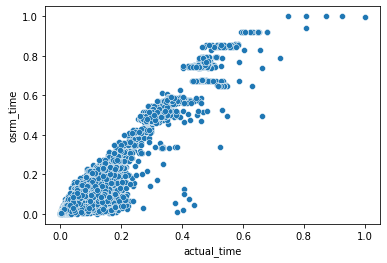

In [ ]:
Min_Max = pd.DataFrame(Min_Max, columns=['actual_time', 'osrm_time', 'segment_actual_time', 'segment_osrm_time', 'osrm_distance', 'segment_osrm_distance','actual_distance_to_destination', 'timedelta'])
sns.scatterplot(x=Min_Max['actual_time'], y=Min_Max['osrm_time'])

In [ ]:
trip['SourceState'].value_counts().head(5)

Maharashtra    2682
Karnataka      2229
Haryana        1681
Tamil Nadu     1085
Delhi           791
Name: SourceState, dtype: int64

In [ ]:
trip['SourceCity'].value_counts().head(5)

Gurgaon      1022
Bengaluru    1015
Bhiwandi      811
Bangalore     755
Delhi         618
Name: SourceCity, dtype: int64

In [ ]:
trip['Dest_State'].value_counts().head(5)

Maharashtra    2591
Karnataka      2275
Haryana        1667
Tamil Nadu     1072
Telangana       838
Name: Dest_State, dtype: int64

In [ ]:
trip['Dest_State'].value_counts().head(5)

Maharashtra    2591
Karnataka      2275
Haryana        1667
Tamil Nadu     1072
Telangana       838
Name: Dest_State, dtype: int64

In [ ]:
trip['SourceState'].value_counts().tail(5)

Dadra and Nagar Haveli    15
Pondicherry               12
Nagaland                   5
Arunachal Pradesh          4
Mizoram                    4
Name: SourceState, dtype: int64

In [ ]:
trip['SourceCity'].value_counts().tail(5)

Mylduthuri    1
Modinagar     1
Nowda         1
PaontSahib    1
Phulera       1
Name: SourceCity, dtype: int64

In [ ]:
trip['Dest_State'].value_counts().tail(5)

Meghalaya      8
Mizoram        6
Nagaland       1
Tripura        1
Daman & Diu    1
Name: Dest_State, dtype: int64

In [ ]:
trip['Dest_City'].value_counts().tail(5)

Shevgaon     1
Asansol      1
Sillod       1
Palamaner    1
Lunawada     1
Name: Dest_City, dtype: int64

Observations:
    
    Maharashtra is the busiest source state followed by Karnataka and Haryana.
    Gurgaon is the busiest source city followed by Bengaluru and Bhiwandi.
    Maharashtra busiest destination state followed by Karnataka and Haryana.
    Bengaluru is the busiest destination city with Mumbai and Gurgaon.
    Mizoram, Nagaland, Arunachal Pradesh among the lowest active source state. 
    Mizoram, Nagaland, Tripura and Daman & Diu among the lowest active destination state.    

In [ ]:
Corridor=trip[['SourceCity','SourcePlace','SourceCode','Dest_Code','Dest_Place','Dest_City']]
Corridor.value_counts()

SourceCity  SourcePlace  SourceCode  Dest_Code  Dest_Place  Dest_City 
Chandigarh  Mehmdpur     H           H          Mehmdpur    Chandigarh    175
Bangalore   Nelmngla     H           HB         KGAirprt    Bengaluru     151
Muzaffrpur  Bbganj       I           I          Bbganj      Muzaffrpur    130
Bengaluru   Bomsndra     HB          HB         KGAirprt    Bengaluru     121
Bhiwandi    Mankoli      HB          HB         Mankoli     Bhiwandi      113
                                                                         ... 
Jairampur   Mdiclcly     D           D          CivilHPL    Margherita      1
Jalore      RoopNgr      D           D          BazarDPP    Sumerpur        1
Jammikunta  ConduDPP     D           I          HunterRd    Warangal        1
Jammu       Central      I           H          Mehmdpur    Chandigarh      1
Wardha      RamaNgr      D           DPP        Central     Deoli           1
Length: 1559, dtype: int64

Observations:

Busiest Corridors:

    1. Chandigarh (Mehmdpur H - Mehmdpur H)
    2. Bengaluru (Nelmngla H - KGAirprt HB)
    3. Muzaffrpur (Bbganj I - Bbganj I)

Insights and Recommendations:

    1. We have a more of short distance interstate orders which contributes a large volume of deliveries. Delhivery can concentrate on improving the quality of service to these segment of customers to increase the revenue.

    2. We have FTL orders upto a distance of upto 2000 KMs and Carting upto a maximum of less than 500 KMs. Since we have more short orders the number of carting route type is more 8906 out of 14800 total trips. Company can think of increasing the FTL route type to increase the revenue.
    
    3. Most deliveries(75%) are within the range of  370 minutes.

    4. Most deliveries(75%) are within the range of 165 kms.
    
    5. we have quite a lot outliers in the data.

    6. There are only few states and cities which are contributing a large portion to the total number of the deliveries. Company can think of expanding their foothold in the other states and cities as well to expand their market. They can think of setting up of infrastructure needed to in many other states and cities before other companies penetrate the smaller states and cities.
    
    7. As we have seen from the hypothesis testing above that aggregated osrm time and aggregated actual time are significantly different, company will have to make some correction in calculating osrm time to give better estimation of time. This would certainly would work in favour of customers satisfaction and retaining of customers.
    
    8. Also, from the other hypothesis testing we had seen that there is no significant statistical difference between the other measures of time and distance. This is certainly good indicator for the company as they can maintain this or further improve to reduce the differences in order to give better services and hence retention of customers to increase their hold in the market.

